## Import Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Define functions

In [2]:
## DEFINE BEAUTIFUL SOUP FUNCTION 1, SETUP ARRAYS

def soup2list(src, list_, attr=None):
    if attr:
        for val in src:
            list_.append(val[attr])
    else:
        for val in src:
            list_.append(val.get_text())
    
# Initialize empty lists to store the extracted information
tourlink = []
mobility_rating = []
summary = []
review_count =[]

from_page = 1
to_page = 50

In [4]:
from bs4 import BeautifulSoup
import requests

def extract_info(tour_link):
    response = requests.get(tour_link)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract review count
    review_count_element = soup.select_one('section[data-reviewcount]')
    if review_count_element:
        review_count = review_count_element.get('data-reviewcount')
    else:
        review_count = 0

    # Extract mobility rating dynamically
    mobility_rating_element = soup.find('p', class_='mobilityRating')
    mobility_rating = mobility_rating_element.get('class')[-1] if mobility_rating_element else 0

    # Extract summary
    summary_element = soup.find('div', itemprop='description')
    if summary_element:
        summary = summary_element.text.strip()
    else:
        summary = None

    return tour_link, mobility_rating, summary, review_count


# Path to the CSV file
csv_file_path = r"C:\Users\santo\Web Scraping\CSV_Outputs\GRJ\GRJ_ToursList_20240111_1029.csv"

# Read the first 5 rows from the CSV file
tour_links = []
with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        tour_links.append(row['tour_link'])
#         if len(tour_links) >= 15:
#             break

# # List of tour links
# tour_links = [
#     "https://www.greatrail.com/tours/classic-glacier-express-brig-chur/",
#     "https://www.greatrail.com/tours/five-star-indias-golden-triangle-and-shimla/",
#     "https://www.greatrail.com/tours/traditional-glacier-express-train"
#     # Add more tour links as needed
# ]


# Arrays to store information
tourlink_array = []
mobility_rating_array = []
summary_array = []
review_count_array = []

# Loop through each tour link and extract information
for index, tour_link in enumerate(tour_links, start=1):
    print(f"Processing Tour Link {index}/{len(tour_links)}")
    tourlink, mobility_rating, summary, review_count = extract_info(tour_link)
    tourlink_array.append(tourlink)
    mobility_rating_array.append(mobility_rating)
    summary_array.append(summary)
    review_count_array.append(review_count)


# Create a DataFrame
df = pd.DataFrame({
    'tour_link': tourlink_array,
    'Mobility Ratings (dynamically extracted)': mobility_rating_array,
    'Summary': summary_array,
    'Review Counts': review_count_array
})



Processing Tour Link 1/228
Processing Tour Link 2/228
Processing Tour Link 3/228
Processing Tour Link 4/228
Processing Tour Link 5/228
Processing Tour Link 6/228
Processing Tour Link 7/228
Processing Tour Link 8/228
Processing Tour Link 9/228
Processing Tour Link 10/228
Processing Tour Link 11/228
Processing Tour Link 12/228
Processing Tour Link 13/228
Processing Tour Link 14/228
Processing Tour Link 15/228
Processing Tour Link 16/228
Processing Tour Link 17/228
Processing Tour Link 18/228
Processing Tour Link 19/228
Processing Tour Link 20/228
Processing Tour Link 21/228
Processing Tour Link 22/228
Processing Tour Link 23/228
Processing Tour Link 24/228
Processing Tour Link 25/228
Processing Tour Link 26/228
Processing Tour Link 27/228
Processing Tour Link 28/228
Processing Tour Link 29/228
Processing Tour Link 30/228
Processing Tour Link 31/228
Processing Tour Link 32/228
Processing Tour Link 33/228
Processing Tour Link 34/228
Processing Tour Link 35/228
Processing Tour Link 36/228
P

## Clean features

In [5]:
# Create 'Mobility_rating' column
df['Mobility_rating'] = df['Mobility Ratings (dynamically extracted)'].str[-1]

In [6]:
# Drop the 'href_links' column if needed
df = df.drop('Mobility Ratings (dynamically extracted)', axis=1)

In [7]:
# Print the first 15 rows
print(df.head(15))    

                                            tour_link  \
0   https://www.greatrail.com/tours/classic-glacie...   
1   https://www.greatrail.com/tours/five-star-indi...   
2   https://www.greatrail.com/tours/traditional-gl...   
3   https://www.greatrail.com/tours/simply-lake-ga...   
4   https://www.greatrail.com/tours/sirmione-lake-...   
5   https://www.greatrail.com/tours/wengen-and-the...   
6   https://www.greatrail.com/tours/vintage-railwa...   
7   https://www.greatrail.com/tours/austrian-alps-...   
8   https://www.greatrail.com/tours/edinburgh-fort...   
9   https://www.greatrail.com/tours/grand-imperial...   
10  https://www.greatrail.com/tours/the-italian-ri...   
11  https://www.greatrail.com/tours/the-isles-of-s...   
12  https://www.greatrail.com/tours/first-class-gl...   
13  https://www.greatrail.com/tours/railways-castl...   
14  https://www.greatrail.com/tours/the-outer-hebr...   

                                              Summary Review Counts  \
0   Experience m

In [8]:
# Read the original CSV file into a DataFrame
original_df = pd.read_csv(csv_file_path)

# Merge the DataFrames on the 'Tour Links' column
merged_df = pd.merge(original_df, df, on='tour_link', how='inner')

# Print or use the merged DataFrame as needed
print(merged_df.head())

      id                                        name  price  days brand  \
0  GEJ24                     Classic Glacier Express   2395     9   GRJ   
1  LTC24  India’s Golden Triangle, Tigers and Shimla   2295    14   GRJ   
2  GYJ24                 Traditional Glacier Express   1795     8   GRJ   
3  DZL24                           Simply Lake Garda   1695    10   GRJ   
4  SRL24                      Sirmione on Lake Garda   1895    10   GRJ   

        category         offer_text destinations  rating  discount  \
0  Escorted tour  Save up to £150pp  Switzerland     4.6     100.0   
1  Escorted tour  Save up to £300pp        India     4.7     200.0   
2  Escorted tour  Save up to £150pp  Switzerland     4.6     100.0   
3  Escorted tour  Save up to £150pp        Italy     4.3     100.0   
4  Escorted tour  Save up to £150pp        Italy     4.4     100.0   

   popularity  istravelmarvel  \
0           1               1   
1           1               1   
2           2               0

In [12]:
# Rename merged_df to df
df = merged_df

In [13]:
# Fill NaN values in 'Mobility_rating' with 0
df['Mobility_rating'] = df['Mobility_rating'].fillna(0)
df['Review Counts'] = df['Review Counts'].astype(int)
df['Mobility_rating'] = df['Mobility_rating'].astype(int)

In [15]:
print(df.dtypes)

id                  object
name                object
price                int64
days                 int64
brand               object
category            object
offer_text          object
destinations        object
rating             float64
discount           float64
popularity           int64
istravelmarvel       int64
tour_link           object
Summary             object
Review Counts        int32
Mobility_rating      int32
dtype: object


## Export data to csv

In [ ]:
# # Define the path for the output CSV file
# output_csv_file_path = r"C:\Users\santo\Web Scraping\CSV_Outputs\GRJ\Merged_Output.csv"

# # Write the merged DataFrame to the CSV file
# merged_df.to_csv(output_csv_file_path, index=False)

# print(f"Merged DataFrame has been successfully written to {output_csv_file_path}")

## Exploratory analysis of full dataset:

## Which are the top 10 tours bringing in the most money? [proxy]

In [36]:
# Create a new column 'proxy_revenue' as the product of 'Review Counts' and 'Price' columns
df['proxy_revenue'] = df['Review Counts'] * df['price']

# Create a new DataFrame with only the desired columns
selected_columns = ['name', 'price', 'days', 'Review Counts', 'proxy_revenue']
selected_df = df[selected_columns].copy()

# Sort the DataFrame by 'proxy_revenue' in descending order and select the top 20
top_revenue_tours = selected_df.sort_values(by='proxy_revenue', ascending=False).head(20)

# # Print the top 20 tours
# print(top_revenue_tours.head())

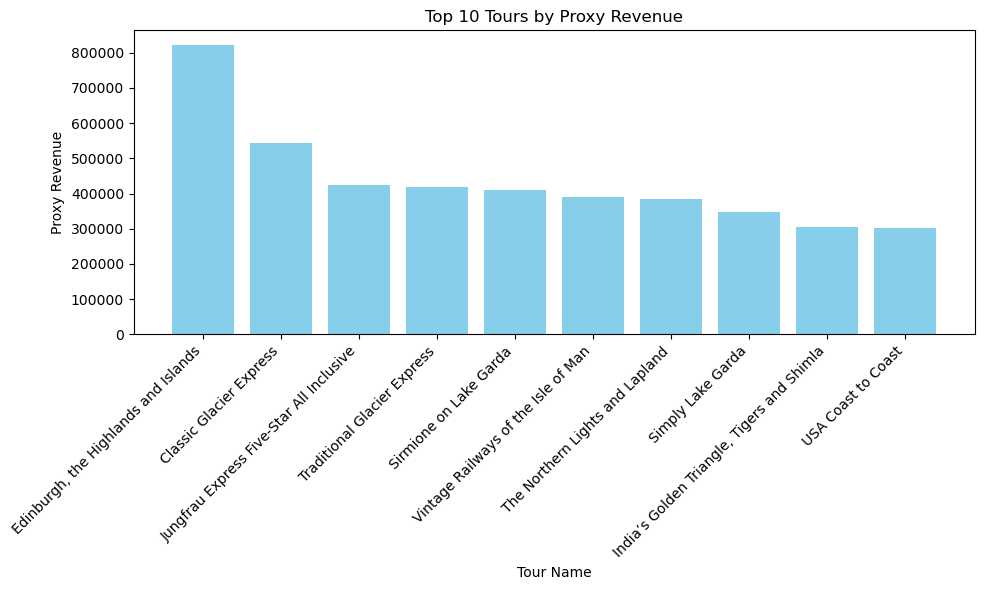

In [23]:
# Assuming 'top_revenue_tours' is the DataFrame containing the top 10 tours by proxy_revenue
top_10_tours = top_revenue_tours.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_tours['name'], top_10_tours['proxy_revenue'], color='skyblue')
plt.xlabel('Tour Name')
plt.ylabel('Proxy Revenue')
plt.title('Top 10 Tours by Proxy Revenue')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# Assuming 'df' is your original DataFrame
# If not already done, convert the 'destinations' column to strings
df['destinations'] = df['destinations'].astype(str)

# Split destinations by commas and count the number of countries
df['num_countries'] = df['destinations'].apply(lambda x: len(x.split(',')))

# Create a new DataFrame with proxy_revenue shared by the number of countries
new_df = pd.DataFrame({
    'destinations': df['destinations'].str.split(','),
    'proxy_revenue': df['proxy_revenue'],
    'proxy_revenue_share': df['proxy_revenue'] / df['num_countries']
})

# Explode the 'destinations' column to create new rows
new_df = new_df.explode('destinations')

# # Display the new DataFrame
# print(new_df.head())

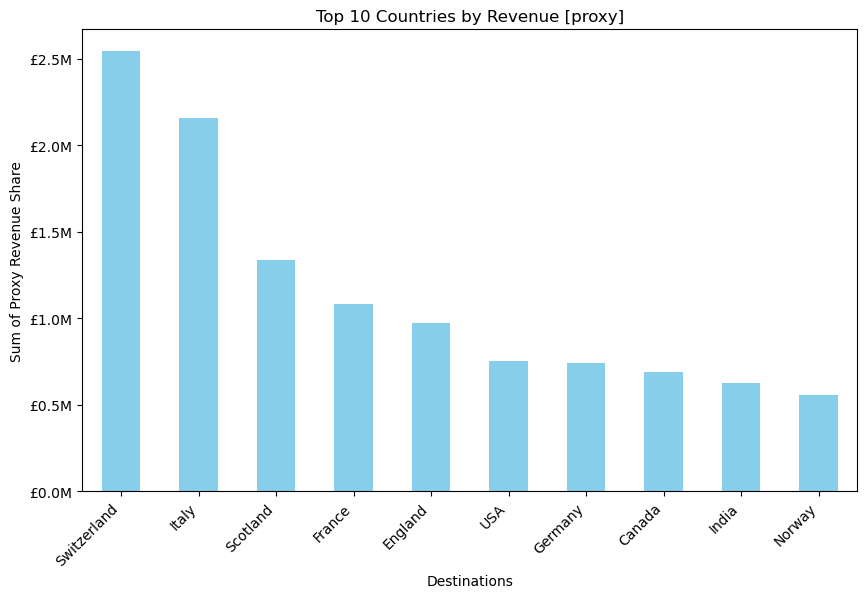

In [32]:
# Assuming 'new_df' is the final DataFrame after exploding the 'destinations' column
# Group by 'destinations' and sum the 'proxy_revenue_share'
destination_sum = new_df.groupby('destinations')['proxy_revenue_share'].sum()

# Sort the destinations by sum of proxy_revenue_share and select the top 10
top_destinations = destination_sum.sort_values(ascending=False).head(10)

# Define a function to format y-axis labels in '£ millions'
def millions_formatter(x, pos):
    return f'£{x / 1e6:.1f}M'

# Plot the bar chart with custom y-axis formatter
plt.figure(figsize=(10, 6))
ax = top_destinations.plot(kind='bar', color='skyblue')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Top 10 Countries by Revenue [proxy]')
plt.xlabel('Destinations')
plt.ylabel('Sum of Proxy Revenue Share')
plt.xticks(rotation=45, ha='right')
plt.show()